In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Information about dataset

In [2]:
from sklearn import datasets
digits = datasets.load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [3]:
#all the numbers are stored in images array form
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [4]:
main_data = digits['data']
targets = digits['target']
print(len(main_data))

1797


In [5]:
#function to display digit

%matplotlib inline
def show_digit(index):
    plt.imshow(digits.images[index], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('The digit is: '+ str(digits.target[index]))
    plt.show()

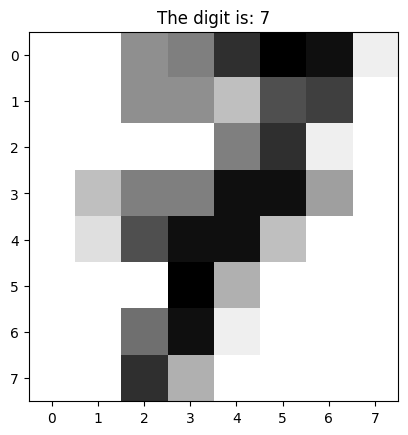

In [6]:
show_digit(7)

For this 1797 data we have to consider only 1791 as training dataset and last 6 data for validation dataset

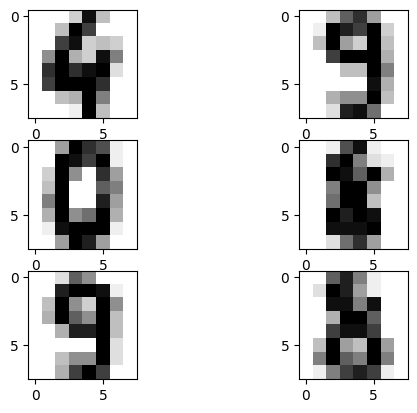

In [7]:
%matplotlib inline

plt.subplot(321)
plt.imshow(digits.images[1791], cmap=plt.cm.gray_r,
interpolation='nearest')

plt.subplot(322)
plt.imshow(digits.images[1792], cmap=plt.cm.gray_r,
interpolation='nearest')

plt.subplot(323)
plt.imshow(digits.images[1793], cmap=plt.cm.gray_r,
interpolation='nearest')

plt.subplot(324)
plt.imshow(digits.images[1794], cmap=plt.cm.gray_r,
interpolation='nearest')

plt.subplot(325)
plt.imshow(digits.images[1795], cmap=plt.cm.gray_r,
interpolation='nearest')

plt.subplot(326)
plt.imshow(digits.images[1796], cmap=plt.cm.gray_r,
interpolation='nearest')

## Support Vector Classifier

In [8]:
from sklearn import svm
svc = svm.SVC(gamma = 0.001, C=100.)

In [9]:
svc.fit(main_data[:1790] , targets[:1790])

SVC(C=100.0, gamma=0.001)

In [10]:
predictions = svc.predict(main_data[1791:])

In [11]:
predictions , targets[1791:]

(array([4, 9, 0, 8, 9, 8]), array([4, 9, 0, 8, 9, 8]))

From SVC we get 100% accuracy
Training Data : 1790
Test Data : 6

## Decision Tree Classifier

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dt = DecisionTreeClassifier(criterion = 'gini')
dt.fit(main_data[:1600] , targets[:1600]) # this time we only use 1600 as train and 197 as test

DecisionTreeClassifier()

In [14]:
prediction2 = dt.predict(main_data[1601:])

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [16]:
confusion_matrix(targets[1601:], prediction2)

array([[17,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 16,  0,  0,  0,  0,  1,  0,  3,  0],
       [ 0,  0, 13,  1,  0,  1,  0,  0,  2,  0],
       [ 0,  2,  1,  9,  1,  2,  0,  6,  1,  0],
       [ 0,  0,  1,  0, 18,  0,  0,  2,  0,  1],
       [ 0,  0,  0,  1,  1, 16,  1,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  1, 19,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  1,  0, 16,  0,  1],
       [ 1,  3,  1,  0,  0,  0,  0,  0, 12,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  2,  1, 16]], dtype=int64)

In [17]:
accuracy_score(targets[1601:], prediction2)

0.7755102040816326

From Decision Tree Classifier we get 78 % Accuracy
Training Data : 1600
Test_data : 197

## Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rc = RandomForestClassifier(n_estimators = 150)

In [20]:
rc.fit(main_data[:1500], targets[:1500])

RandomForestClassifier(n_estimators=150)

In [21]:
prediction3= rc.predict(main_data[1501:])

In [22]:
accuracy_score(targets[1501:], prediction3)

0.9256756756756757

From Random Forest Classifier we get high accuracy for n_estimators = 150
Training data : 1500
Test Data : 297

## Conclusion

Data maters the most we need a good amount of data for modal.if we have a less data then we can use some other machine learning classifier algorithms like random forest which is also give 91 % accuracy on 1500 trainset which is less data compare to Support vector classifier